In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click /off the raw code."></form>''')

## <span style="color:orange;font-size:1.4em;"><b>EXPLORATORY DATA ANALYSIS</b> </span> 

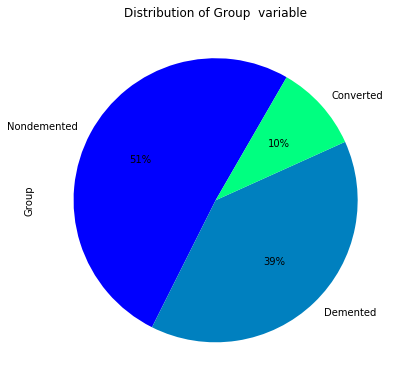

In [15]:
plot_piechart('Group')

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>39% of them are Demented,51% are Nondemented and 10% are converted</b>

<b>So next we will analyze numerical features and performed univariate analysis on those features to see if we find any pattern or some interesting insights.
So, we first begin with analyzing the most important categorical feature i.e., Clinical Dementia Rating (CDR).</b>

In [16]:
df_dementia1.Group.describe()

count             373
unique              3
top       Nondemented
freq              190
Name: Group, dtype: object

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>This score is useful for characterizing and tracking a patient’s level of impairment/dementia:<br>

0 = Normal<br>
0.5 = Very Mild Dementia or Questionable<br>
1 = Mild Dementia<br>
2 = Moderate Dementia<br>
3 = Severe Dementia<br></b>

In [19]:
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_dementia1.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_dementia1.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'



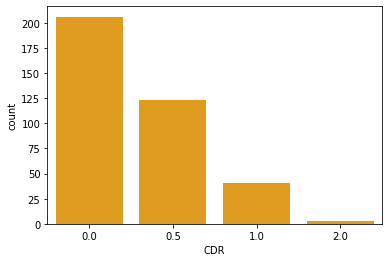

In [20]:
sns.countplot(x='CDR',data=df_dementia1,color="orange")

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> About 200 patients have CDR value of 0 and is higher than the rest of them .</b>

In [21]:
df_dementia1['CDR'] = df_dementia1['CDR'].apply(lambda x: cat_CDR(x))

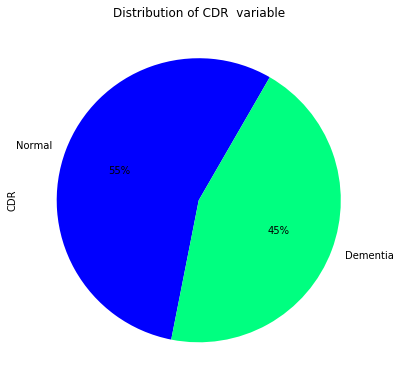

In [22]:
plot_piechart('CDR')

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Distribution of CDR variable.</b>

Text(0.5, 1.0, 'Countplot for MMSE Values')

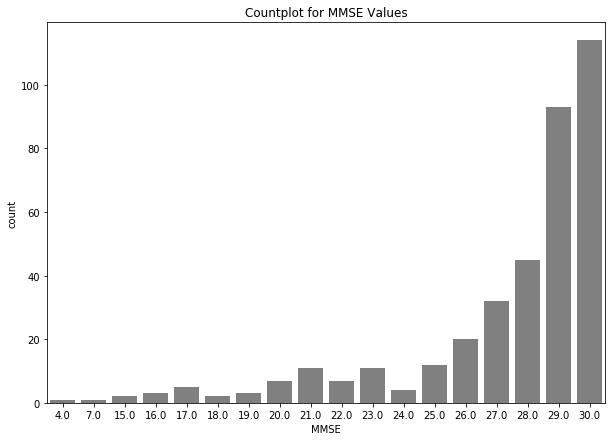

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='MMSE',data=df_dementia1,color="grey")
plt.title("Countplot for MMSE Values")

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> <b>MMSE values of 30 has the highest count.</b>

In [26]:
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                   
        return 'Mild'



In [27]:
df_dementia1['MMSE'] = df_dementia1['MMSE'].apply(lambda x: cat_MMSE(x))

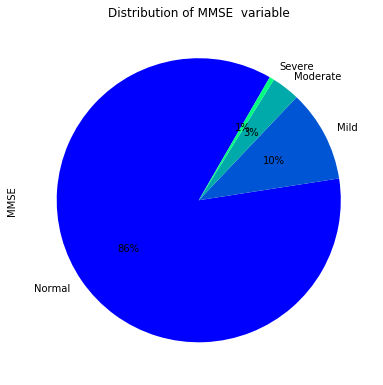

In [28]:
plot_piechart('MMSE')

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> <b>The Normal MMSE is the highest at 86%.</b>

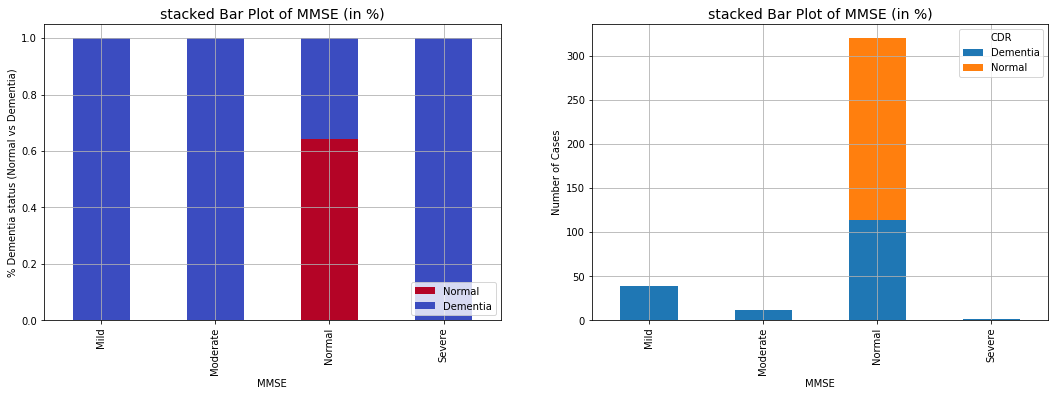

In [29]:
univariate_percent_plot('MMSE')

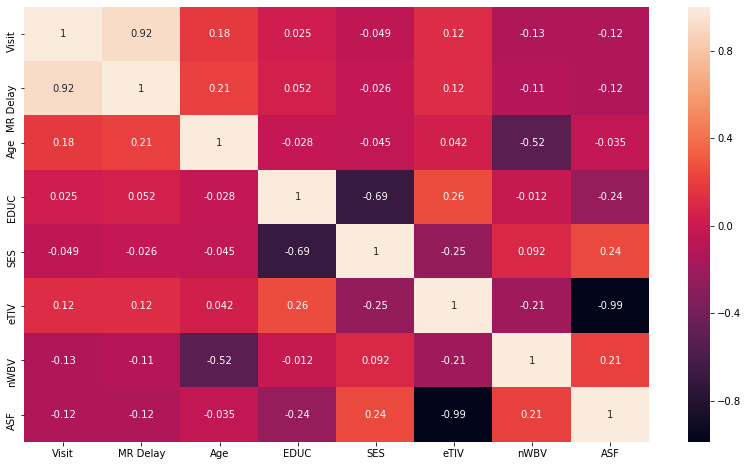

In [30]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_dementia1.corr(), annot=True)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>As we can see Visit and MR Delay are showing close correlation to 0.92.</b>
<b>As we can see from the above plot, there are around 40% of the cases in Normal MMSE status are of dementia cases accroding to CDR scoring.<b>


<b>Next we will analyze Age feature to see how age is impacting the dementia status.</b>

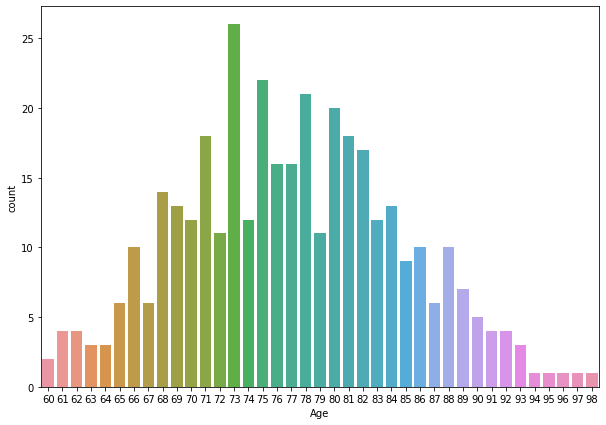

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(df_dementia['Age'])

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Age group of 70-80 has the highest count.</b>

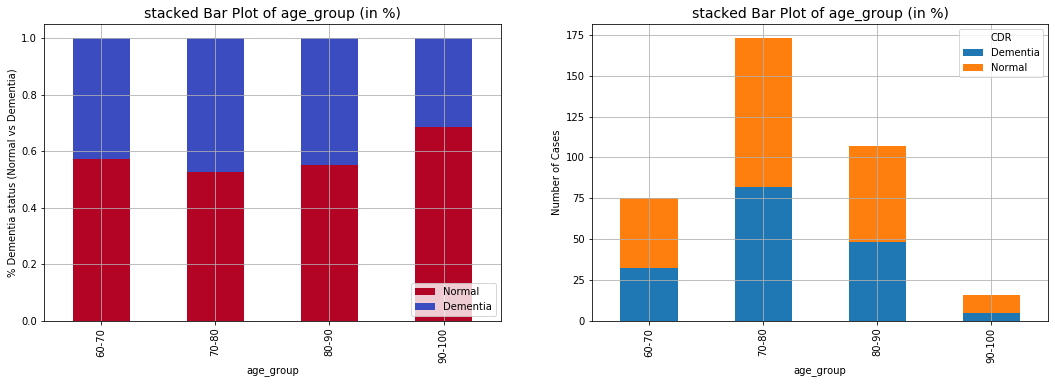

In [34]:
univariate_percent_plot('age_group')

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span><b> Almost half of the people in the age group of 70-80 is demented.</b>

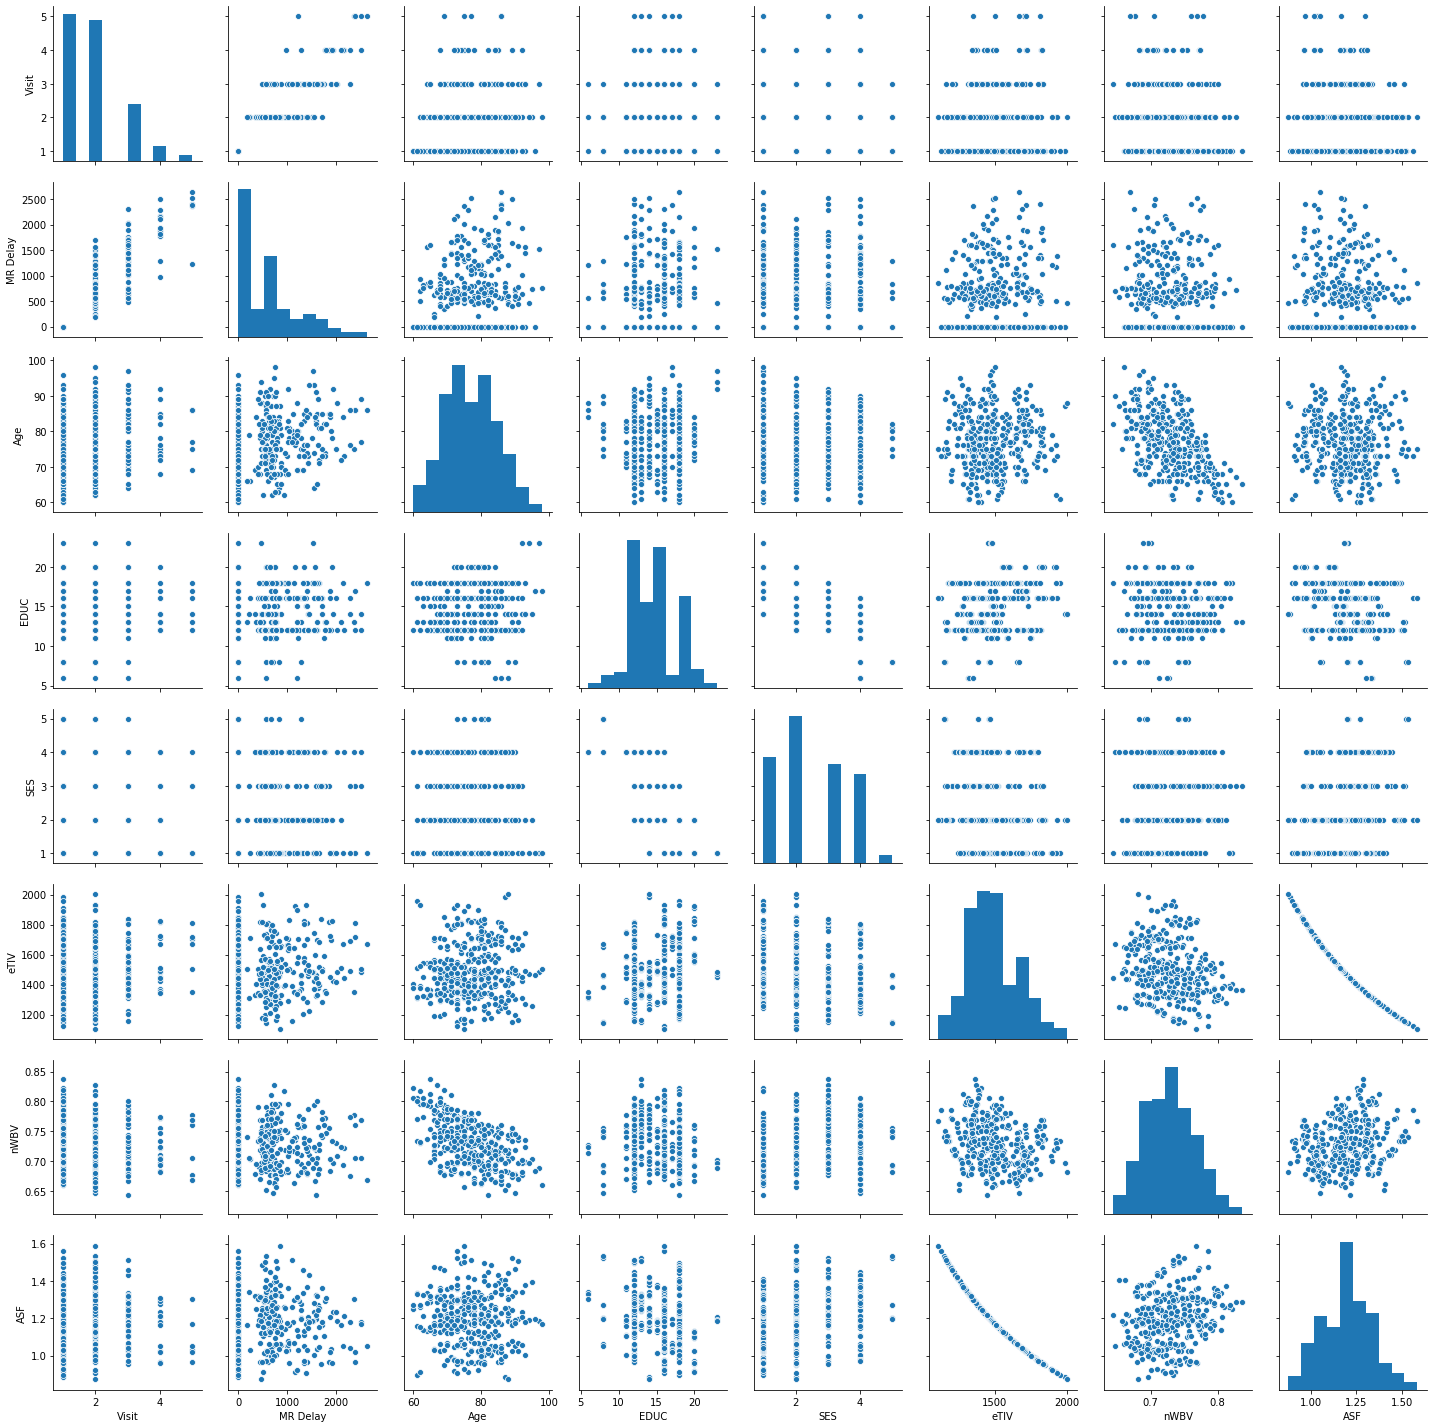

In [35]:
sns.pairplot(df_dementia)
plt.show()

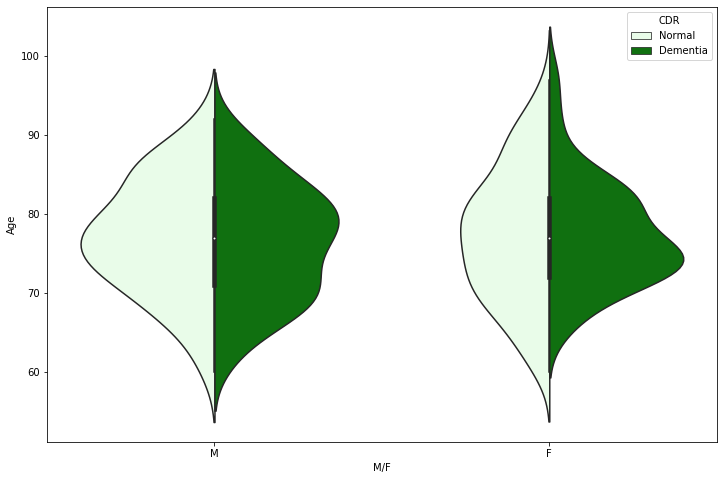

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_dementia,color="green")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 

<b>As we can observe from the above plot, in case of Male most number of dementia cases are reported in the age of around 80 years while in case of females dementia is prevalent in 75 years of Age. One more observation suggests that in case of Males dementia starts early even before 60 years of age while in case of females demetia generally after 60 years of age.

Next we will analyze another important feature named eTIV.</b>

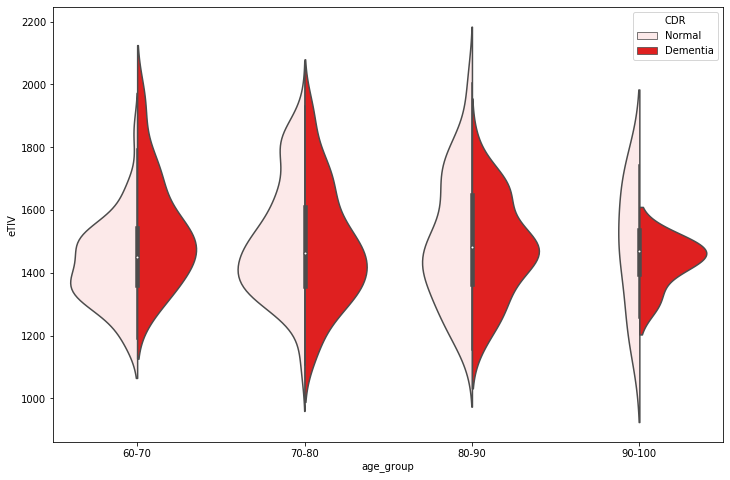

In [38]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="age_group", y="eTIV",hue="CDR",split=True, data=df_dementia1,color="red")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </span> 
<b>The eTIV of all the age groups are between 1400 and 1600. For the age group of 90-100 it's only between 1200 and 1600 whereas for the rest it starts from 1000 and ends somewhere around 2100.</b>

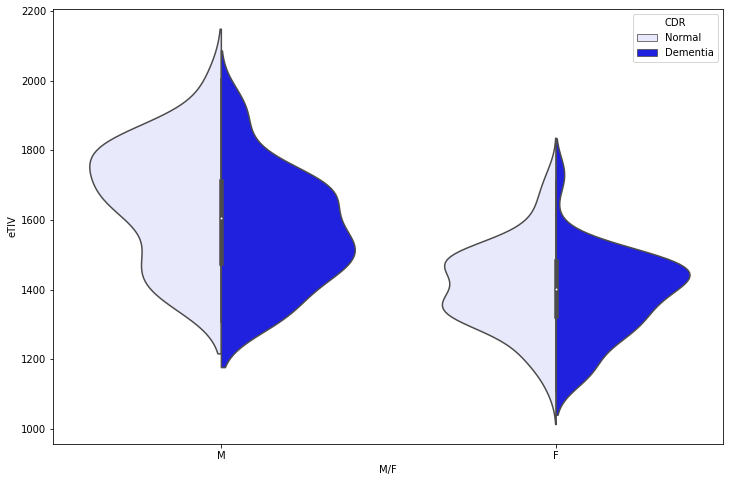

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_dementia1,color="blue")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process.</b>

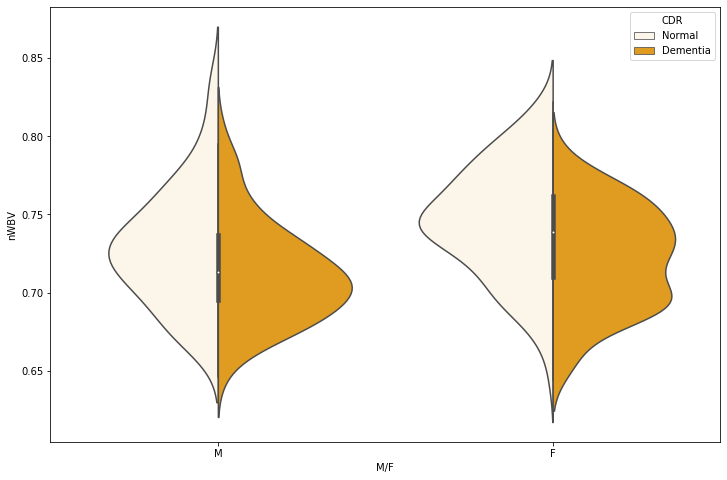

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_dementia1,color="orange")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The nWBV of male and female are different. For male the demented poeple have a nWBV is high between 0.65 and 0.75.</b>

In [41]:
df_dementia['EDUC'].describe()

count    373.000000
mean      14.597855
std        2.876339
min        6.000000
25%       12.000000
50%       15.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64

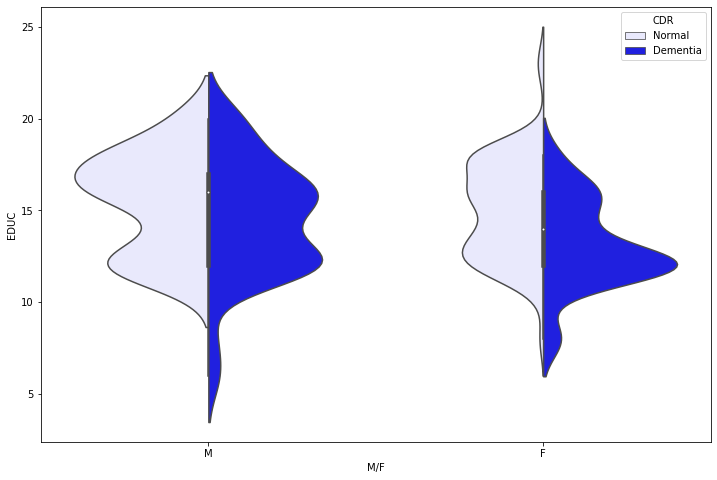

In [42]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_dementia1,color="Blue")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>As we can observe from the above plot,Mens having education level between 10 and 17 have higher level of dementia cases and mens started to show dymentia symptoms with less education levels starting from 4 years whereas females starts showing dymentia symptoms after 6 years of education level having highest peak at 13 years of age.</b>

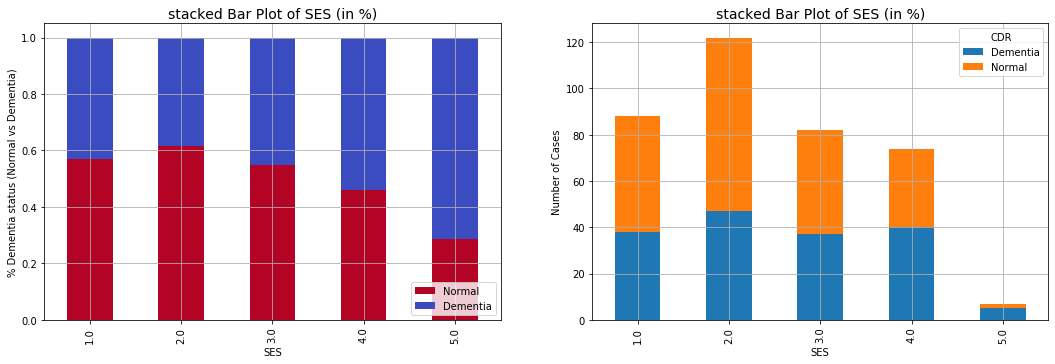

In [44]:
univariate_percent_plot('SES')

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>At lowest level of socio economic status there is a highest probability of dementia which may be due to lower economic condition which results in depression, sufferings which in turn results in dementia.</b>

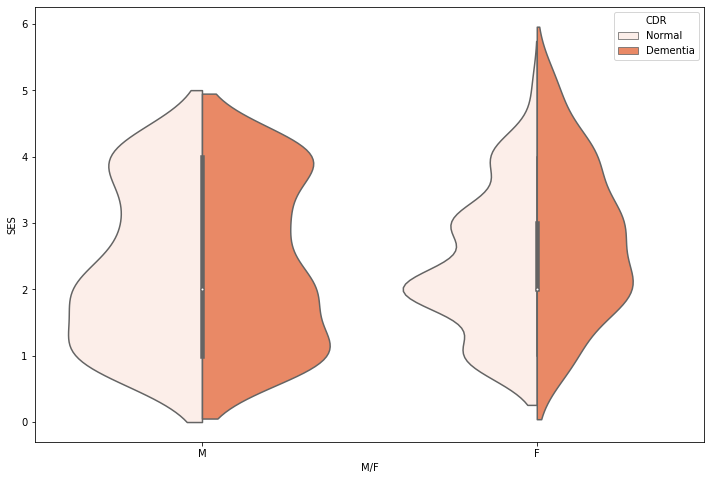

In [45]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_dementia1,color="coral")
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>Interesting pattern observed from the above plot that in mens there are two peaks of highest dementia cases one at 1 (Highest status) and 4(lower status) and in between 1 and 4 there less instances of dementia cases whereas in case of females highest peak is at 2 whereas at 1 and 5 there are slightly less dementia cases reported.
It suggests that womens have less dementia probability at extreme higher and extreme lower level of socio economic status while mens have exactly opposite phenomenon.</b>

<b>ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)</b>

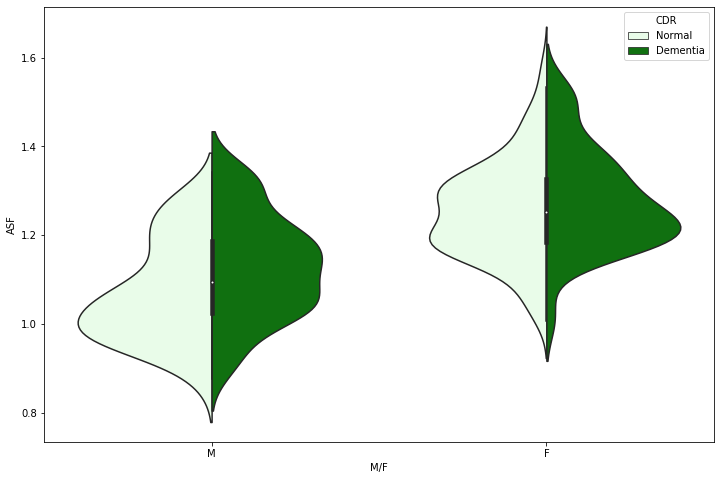

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_dementia1,color="green")
plt.show()

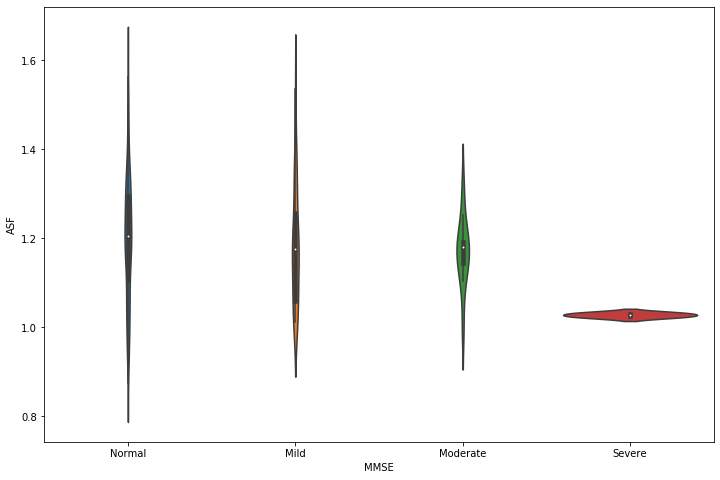

In [48]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>From the above plot we can get the intuition about ASF as in case of normal patients the value of ASF distributed between 0.8 and 1.6 but as the patients started showing dementia cases its value centered around 1 as in case of Mild, Moderate and Severe it shrinks down to 1.1</b>

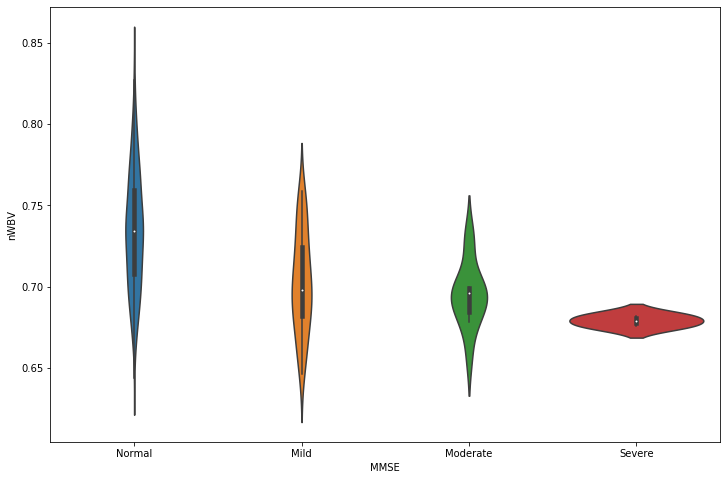

In [49]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>Same pattern observed in case of nWBV as the dementia level increases nWBV centered between 0.65 and 0.70.</b>


<b><span style="color:Red;font-size:1.4em;"><b>Key Insights: </b></span><br></b>

<b>1.Most of the cases of dementia observed in the age group of 70 - 80 years of Age.<br>
    
2.Men develop dementia at early age before 60 years while women have tendency of dementia at later age of later than 60 years<br><br>

3.In men dementia starts at an education level of 4 years and most prevalent at education level of 12 years and 16 years and it can also extend upto more than 20 years of education level, while in women dementia starts after 5 years of education level and most prevalent around 12 to 13 years of education level and it started to decrease as women's education level increases<br>

4.Dementia is prevalent in Men having highest and lowest socio economic status while women having medium socio economic status have higher dementia cases.<br>

5.Lower values of ASF close to 1 corresponds to severe dementia cases.<br>

